In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
from comet_ml import Experiment
from matplotlib import pyplot as plt

In [2]:
# создаем эксперимент на comet.ml
experiment = Experiment(
    api_key="eunXyOkMIOmgXb6nQRN3xEEhj",
    project_name="medical-appointment",
    workspace="vadimkopytko", 
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to check backend version at URL: 'https://www.comet.com/clientlib/isAlive/ver'
COMET ERROR: Run will not be logged 
For more details, please refer to: https://www.comet.com/docs/v2/api-and-sdk/python-sdk/warnings-errors/
Traceback (most recent call last):
  File "C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\urllib3\connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\urllib3\connectionpool.py", line 1042, in _validate_conn
    conn.connect()
  File "C:\Users\vadim.kopytko\AppData\Roaming\Python\Python31

In [3]:
# загружаем данные из csv файла
df = pd.read_csv('KaggleV2-May-2016.csv')

In [4]:
# посомтрим на датасет
display(df)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# посомтрим на статистические характеристики столбцов и выберем 7 столбцов с числовым данными
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


В итоге нам потребуются столбцы Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received. Отбрасываем id пациента и клиники.

In [7]:
# оставляем только числовые значения
df_main = df.drop([ 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood','No-show'], axis=1) 

In [8]:
display(df_main)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1
110523,51,0,0,0,0,0,1
110524,21,0,0,0,0,0,1
110525,38,0,0,0,0,0,1


In [9]:
# посмотрим на матрицу корреляции между признаками
df.corr().round(2)

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_24924\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.00,0.00,-0.00,-0.00,-0.01,0.00,0.01,-0.01,-0.01
AppointmentID,0.00,1.00,-0.02,0.02,0.01,0.02,0.03,0.01,-0.26
Age,-0.00,-0.02,1.00,-0.09,0.50,0.29,0.10,0.08,0.01
Scholarship,-0.00,0.02,-0.09,1.00,-0.02,-0.02,0.04,-0.01,0.00
Hipertension,-0.01,0.01,0.50,-0.02,1.00,0.43,0.09,0.08,-0.01
Diabetes,0.00,0.02,0.29,-0.02,0.43,1.00,0.02,0.06,-0.01
Alcoholism,0.01,0.03,0.10,0.04,0.09,0.02,1.00,0.00,-0.03
Handcap,-0.01,0.01,0.08,-0.01,0.08,0.06,0.00,1.00,-0.02
SMS_received,-0.01,-0.26,0.01,0.00,-0.01,-0.01,-0.03,-0.02,1.00


C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_24924\1346278482.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')


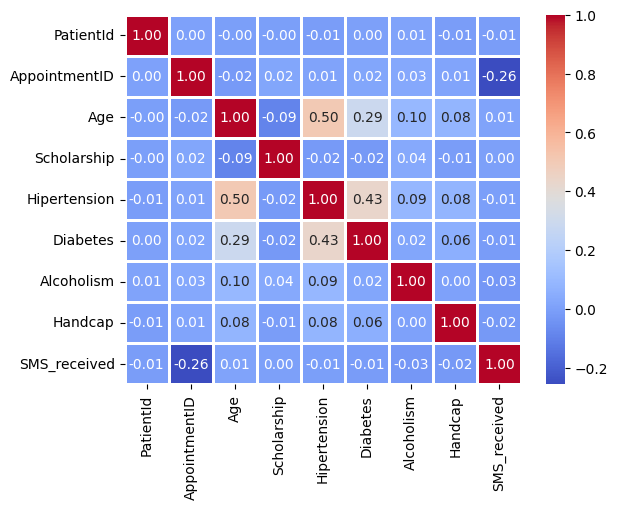

In [14]:
# создадим график темпловой карты матрицы корреляции изалогируем его
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')
experiment.log_figure(figure=plt)

In [ ]:
# отображение данных с comet_ml в ноутбуке
experiment.display()